# CAFETERIAI   ⚙️ A Smart Cafe ⚙️
AI CLUB 

ALPHARETTA HIGH SCHOOL

🍏🍓🍇🥚🥞🍗🍔🍟🍕🌮🍣🍦🍰🥛🍩

# DO AVERAGE OF FIRST 4 BEST PROBABILITIES OF EACH FOOD ITEM AT STAGE --> REPLACE PROB CUT OFF

# FRAUD FACE --> DIFFERENCE FREQUENCY 

# PART -1 --> ALL INPUTES NEEDED

In [1]:
#Number of sec that the food video is cut 
#1000 is 1 sec and 2000 is 2 sec
numsec = 1000
#face confidence is oppisite 
#0 is good and 100 is bad
faceconfmin = 0
faceconfmax = 100
#resnet cutting image min prob percentage 
minimum_percentage_probability = 10
#when detecting food if frequency is lower than x it gets deleted
frequency_delete = 3
#when deleteing food the probability limit it 
probability_limit = 75
#face probability 
#oppiste way 0 is good and 100 is bad
#if greater than----
probabiliy_face_delete = 50
#minimum_distribution
minimum_distribution = 0.75


# PART 0
Setup files and libraries

In [2]:
#!pip3 install dfply
#pip install jupyternotify

In [3]:
import cv2
import numpy as np
import time
import os
import shutil
from PIL import Image
import psutil
import random
import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import random
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import csv
from dfply import *
from IPython.display import Markdown, display
from datetime import date
import pickle
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [5]:
#Folder to save video *new
os.chdir('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_new_vids_in/')
base_dir ='/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_new_vids_in/'

# PART A
#CAPTURE VIDEO
BREAK INTO FRAME
#LOAD FILES IN A COMMON FOLDER UNTIL STUDENT IS IDENTIFIED

# A1. This function extracts images from video with 1 fps

In [6]:
def extract_image_one_fps(video_source_path):
    vidcap = cv2.VideoCapture(video_source_path)
    count = 0
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*numsec)) # 2 second***   
        success,image = vidcap.read()
        ## Stop when last frame is identified
        image_last = cv2.imread("frame{}.png".format(count-1))
        if np.array_equal(image, image_last):
            break
        cv2.imwrite("frame%d.png" % count, image)     # save frame as PNG file
        print( '{}.sec reading a new frame:{}'.format(count,success))
        count += 1

In [7]:
#FUNCTION FOR ROTATION
#--------
def rotate_image(image,deg):
    if deg ==90:
        return np.rot90(image)
    if deg ==180:
        return np.rot90(image,2)
    if deg == 270:
        return np.rot90(image,-1) #Reverse 90 deg rotation
#--------  

In [8]:
def printmd(string):
    display(Markdown(string))
#printmd("<span style='color:blue'>Red text</span>")
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

# A2. Name & Folders

In [10]:
student_name = 'CAFETERIA' ## FIXED NAME AT THIS STAGE input()   

#  🛑 ✋ 🛑 ✋ 🛑 ✋ 🛑 ✋ 🛑 ✋ 🤮
STOP HERE

# A3.2 PRE-RECORDED VIDEOS CONVERTION
(Option B)

In [11]:
# AUTO POPULATE FILE TYPE (mp4, avi, MOV etc.)
x = os.listdir(os.path.join(base_dir, 'CAFETERIA'))
matching = [s for s in x if "CAFETERIA" in s]
filename, V_FORMAT = os.path.splitext(matching[0])
print("V_FORMAT: ",V_FORMAT)
#-----
cap = cv2.VideoCapture(os.path.join(base_dir, student_name, "CAFETERIA" + V_FORMAT ) )
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
print("video length:", video_length)
#----
os.chdir(os.path.join(os.path.join(base_dir,  student_name) ) )
extract_image_one_fps('CAFETERIA'+ V_FORMAT)
#----
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
try: 
    video_length > 96 
    print("VIDEO SIZE ", video_length, " FRAMES")
except ValueError:
    print('Oops! That was an invalid recording. Check the webcam setting and try again')
else:
    print('Thank you.')

V_FORMAT:  .mp4
video length: 145
0.sec reading a new frame:True
1.sec reading a new frame:True
2.sec reading a new frame:True
3.sec reading a new frame:True
4.sec reading a new frame:True
5.sec reading a new frame:True
6.sec reading a new frame:True
7.sec reading a new frame:True
8.sec reading a new frame:True
9.sec reading a new frame:True
10.sec reading a new frame:True
11.sec reading a new frame:True
12.sec reading a new frame:True
13.sec reading a new frame:True
14.sec reading a new frame:True
15.sec reading a new frame:False
VIDEO SIZE  145  FRAMES
Thank you.


# A4. IDENTIFY PERSON
openCV_faceRECOGNITION_f

# A4.a Models

In [12]:
face_cascade = cv2.CascadeClassifier('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/cascades/data/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Face Model (latest!)

In [13]:
recognizer.read('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/recognizers/trainner.yml') # updated 0307
labels = {}
with open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/pickles/labels.pickle', 'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()} 
print(og_labels)

{'aneesh': 0, 'kunal': 1, 'kruthik': 2, 'sidd': 3, 'sahith': 4, 'jeffery': 5, 'hatcher': 6, 'srihith': 7, 'sahil': 8}


# A4.b Read Video Recorded (or Loaded) earlier

In [14]:
os.chdir(os.path.join(os.path.join(base_dir,  student_name) ) )
os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ) 
feedback_vid = os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ) 

In [15]:
# RUN VIDEO RECORDED EARLIER
cap = cv2.VideoCapture(os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ))

# A4.c Identify Student

In [16]:
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
print("video_length:",  video_length)
!pwd

video_length: 140
/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_new_vids_in/CAFETERIA


In [17]:
# THIS CODE DOES NOT DO ROTATION
PICK_NAMES = []
frame_cnt = 0
while(frame_cnt < video_length*.99):
    ret, frame = cap.read()
    try: 
        gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(frame) #, scaleFactor=1.7, minNeighbors=5) #, minSize=(100, 100))
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]        
            # recognizes
            id_, conf = recognizer.predict(roi_gray) # give label id and confidence
            #---- DEFINE PROBABILITY ----#
            if conf >= faceconfmin and conf < faceconfmax:                
                #print(labels[id_])
                #print(conf)
                print(labels[id_], round(conf,0) )
                PICK_NAMES.append( [labels[id_], conf] ) # ****
                #----
                img_item = "ExtractFaceFrame.png"
                cv2.imwrite(img_item, roi_gray)
                #----
                color = (255,0,0) # BGR 0-255
                stroke = 2
                end_cord_x = x+ w
                end_cord_y = y + h
                cv2.rectangle(frame, (x,y), (end_cord_x, end_cord_y), color, stroke)                
        # Display the resulting frame 
        cv2.imshow('frame', frame)
        frame_cnt += 1
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
    except ValueError:
        print('Oops! Either the 1st or last frame invalid')
    else:
        print(frame_cnt)
#----        # BREAK IF PICK_NAMES IS EMPTY
if len(PICK_NAMES) ==0:
    print("NO FACE SAMPLE COLLECTED! ")    

srihith 38.0
1
srihith 33.0
2
srihith 27.0
3
srihith 27.0
4
srihith 31.0
5
srihith 30.0
6
srihith 27.0
7
srihith 27.0
8
srihith 24.0
9
srihith 26.0
10
srihith 26.0
11
srihith 23.0
12
srihith 29.0
13
srihith 28.0
14
srihith 31.0
15
srihith 27.0
16
srihith 27.0
17
srihith 31.0
18
srihith 27.0
19
srihith 27.0
20
srihith 31.0
21
srihith 27.0
22
srihith 31.0
23
srihith 27.0
24
srihith 28.0
25
srihith 27.0
26
srihith 31.0
27
srihith 27.0
28
srihith 36.0
29
srihith 27.0
30
srihith 31.0
31
srihith 31.0
32
srihith 31.0
33
srihith 36.0
34
srihith 30.0
35
srihith 30.0
36
srihith 27.0
37
srihith 25.0
38
srihith 30.0
39
srihith 30.0
40
srihith 29.0
41
srihith 30.0
42
srihith 26.0
43
srihith 23.0
44
srihith 23.0
45
srihith 26.0
46
srihith 24.0
47
srihith 24.0
48
srihith 23.0
49
srihith 24.0
50
srihith 20.0
51
srihith 26.0
52
srihith 26.0
53
srihith 27.0
54
srihith 27.0
55
srihith 28.0
56
srihith 22.0
57
srihith 28.0
58
srihith 28.0
59
srihith 29.0
60
srihith 29.0
61
srihith 29.0
62
srihith 29.0
63
s

In [18]:
if len(PICK_NAMES) ==0:
    print("NO FACE SAMPLE COLLECTED! ")
else:
    print(PICK_NAMES[:10])   

[['srihith', 37.708492057579704], ['srihith', 32.502251608863396], ['srihith', 27.176899271725016], ['srihith', 27.1119741865522], ['srihith', 30.510358677255446], ['srihith', 29.821471001221227], ['srihith', 27.063556273407237], ['srihith', 26.57196987627178], ['srihith', 23.85044444784546], ['srihith', 26.063492244845467]]


# A4.d Resolve Student Identity

In [19]:
df = pd.DataFrame()
for itm in PICK_NAMES:
    teststring =[]
    teststring.append(itm[0])
    teststring.append(itm[1])
    df = df.append([teststring])
    
df.columns = ['name','probability']
#dftest = dftest.reset_index()

In [20]:
df= df.round(2) #***

In [21]:
df = df.sort_values(['name', 'probability'], ascending= True)
df['probability_average'] = df['probability'].mean()
df.head()

name  probability  probability_average
0  srihith        20.10            28.511583
0  srihith        20.33            28.511583
0  srihith        20.79            28.511583
0  srihith        21.95            28.511583
0  srihith        23.04            28.511583

In [22]:
df1 = df.groupby('name')['probability'].median().reset_index()
df1 = df1.sort_values(['probability'], ascending= True)
df1['probability_average'] = df['probability'].mean()
df1

name  probability  probability_average
0  srihith        28.69            28.511583

In [23]:
df2= df.name.value_counts() # FREQUENCY
df2 = pd.DataFrame(df2)
df2.index.name = 'x'
df2.reset_index(inplace=True)
df2.columns = ['name', 'frequency']
#df2.head()
#df2=df2.tail(-1)
#df2

In [24]:
df2['distribution'] = df2['frequency']/video_length

In [25]:
final_face = pd.merge(df1, df2, on='name')
final_face.head()

name  probability  probability_average  frequency  distribution
0  srihith        28.69            28.511583        139      0.992857

In [26]:
final_face_save = final_face

In [27]:
for index, row in final_face.iterrows():
    dist = row['distribution']
    namelist = row['name']
    #print(student_name)
    if dist < minimum_distribution:
        print("Deleting", namelist, "--" ,dist)
        #print(final_face.index[i])
        final_face = final_face[~final_face.name.str.contains(namelist)]
    else:
        student_name = "CAFETERIA"
final_face

name  probability  probability_average  frequency  distribution
0  srihith        28.69            28.511583        139      0.992857

In [28]:
for index, row in final_face.iterrows():
    prob = row['probability_average']
    namelist = row['name']
    if prob > probabiliy_face_delete:
        print("Deleting ->", name, "--",prob)
        final_face = final_face[~final_face.name.str.contains(namelist)]
        #student_name = "CAFETERIA"
print(student_name)

CAFETERIA


In [29]:
final_face

name  probability  probability_average  frequency  distribution
0  srihith        28.69            28.511583        139      0.992857

In [30]:
len(final_face.index)

1

In [31]:
if len(final_face.index) != 0:
    student_name = final_face["name"].values[0]
    print('>> ', final_face["name"].values[0], "<< ", "identity confirmed!", 
          "face recognized", df2['frequency'].values[0], "times out of", video_length, "frames" )
else:
    student_name = "Student_not_identified"
    print('Resolve the Identity Conflict among >>', list(final_face_save.name),  "<<")

>>  srihith <<  identity confirmed! face recognized 139 times out of 140 frames


In [32]:
if student_name == "Student_not_identified":
    %%notify -m 'ERROR YOU ARE NOT IN MODEL'

In [33]:
# PROPOTIONAL VALUES ****NEW
print(final_face["distribution"][0], " percent of time faces was recognized for the highest contender")

0.9928571428571429  percent of time faces was recognized for the highest contender


In [34]:
studentid_conf = round(100* final_face["frequency"].values[0] / sum(final_face["frequency"]),0)
print(studentid_conf, "Calculated Confidence Level 100 is the highest level")

100.0 Calculated Confidence Level 100 is the highest level


In [36]:
# ABSOLUTE VALUE
#printmd("<span style='color:blue'>Red text</span>")
if len(final_face.index) != 0:
    student_name = final_face["name"].values[0]
    print('>> ', final_face["name"].values[0], "<< ", "identity confirmed!", 
          "face recognized", df2['frequency'].values[0], "times out of", video_length, "frames" )
else:
    student_name = "Student_not_identified"
    print('Resolve the Identity Conflict among >>', list(final_face_save.name),  "<<")
# PROPOTIONAL VALUES ****NEW
print("----------------------------->")
print(final_face["distribution"][0], " percent of time faces was recognized for the highest contender")
print("----------------------------->")
studentid_conf = round(100* final_face["frequency"].values[0] / sum(final_face["frequency"]),0)
print(studentid_conf, "Calculated Confidence Level 100 is the highest level")
print("----------------------------->")
print(student_name) # FINAL NAME TO GO FORWARD

# FEEDBACK LOOP

# CONTINUE CODE

🛑 ✋   🛑 ✋    🛑 ✋ 
Confirm Identity by a Captured Image

In [37]:
if student_name == 'Student_not_identified':
    #student_name=input(student_name) # FIXED FOR NOW 🏴🏳️🏴
    student_name="SOME_STUDENT"
print(student_name)

srihith


# PART B 
LaunchPad

# B0.

In [38]:
# ONE TIME ONLY
import os
import numpy as np
import cv2
import datetime
import random

In [39]:
os.chdir('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/')
from utils import CFEVideoConf, image_resize #currently stores in JUSTIN/src folder

In [40]:
base_dir = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/'
video_in = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/'
image_out = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/out/'

In [41]:
os.chdir(os.path.join(base_dir, 'in') )
os.getcwd()

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in'

# B1. Move Files to Student Folder

In [42]:
# MOVE AND RENAME THE FOLDER
# ------------------------------
shutil.move('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_new_vids_in/CAFETERIA', video_in)


'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/CAFETERIA'

In [43]:
now = str(datetime.datetime.now())
os.getcwd()

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in'

In [44]:
#matching = [s for s in os.listdir(".") if student_name in s]
nm_check = [s for s in os.listdir(".") if student_name == s]
if nm_check == []:
    os.rename('CAFETERIA', student_name)
elif nm_check[0] == student_name:
    os.rename(student_name, student_name + str(round(random.random(),2)) )
    os.rename('CAFETERIA', student_name)

In [45]:
video_name = "".join((str(student_name), V_FORMAT))
video_name

'srihith.mp4'

In [46]:
save_path =  os.path.join(base_dir, 'in', student_name, video_name )
save_path

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/srihith/srihith.mp4'

# PART C
IMAGEAI OBJECT SEPARATION
IMAGEAI_OBECTION_DETECTION3_f

In [47]:
from imageai.Prediction import ImagePrediction 
from imageai.Detection import ObjectDetection
detector = ObjectDetection()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [48]:
os.chdir(os.path.join(base_dir, 'in', student_name) )
execution_path = os.path.join(base_dir, 'in', student_name)
execution_path

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/srihith'

# C1. Model Selection

In [49]:
# MODEL option A
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/resnet50_coco_best_v2.0.1.h5')
detector.loadModel()

# C2. Object Separation

In [50]:
!pwd
student_name

/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/srihith


'srihith'

In [51]:
lst_frames = os.listdir()
lst_frames = sorted(lst_frames)
# cleanup 1
if '.DS_Store' in lst_frames: lst_frames.remove('.DS_Store')
lst_frames

['CAFETERIA.mp4',
 'CAFETERIA_face.mp4',
 'ExtractFaceFrame.png',
 'frame0.png',
 'frame1.png',
 'frame10.png',
 'frame11.png',
 'frame12.png',
 'frame13.png',
 'frame14.png',
 'frame15.png',
 'frame2.png',
 'frame3.png',
 'frame4.png',
 'frame5.png',
 'frame6.png',
 'frame7.png',
 'frame8.png',
 'frame9.png']

In [52]:
# cleanup 2 #zero bytes file
for filename in os.listdir(os.path.join(video_in, student_name)):
     if os.path.getsize(filename) == 0:
            os.remove(filename) 
            print("File Removed!")

File Removed!


In [53]:
# FRAMES LIST UPDATED HERE FOR NEXT LOOP
lst_frames=[]
for filename in os.listdir(os.path.join(video_in, student_name)):
    if filename.startswith("frame"):
        lst_frames.append(filename)
lst_frames = sorted(lst_frames)
#lst_frames

# Try Custom Objects! 0311

In [55]:
custom_objects = detector.CustomObjects(bottle = True, 
                                        cup = True,   #fork = True,   knife = True,   spoon = True,   bowl = True,   
                                        banana = True,   
                                        apple = True,   
                                        sandwich = True,   
                                        orange = True,
                                        broccoli = True,   
                                        carrot = True,     
                                        pizza = True,   
                                        donot = True,   
                                        cake = True,
                                        hot_dog = True,
                                        bowl = True,
                                        book = True)
# hotdog = True,  cellphone  = True

In [56]:
print(lst_frames)
for lst in lst_frames:
    print(lst)
    try:
        detections = detector.detectCustomObjectsFromImage(custom_objects = custom_objects, 
                                           input_image= os.path.join( execution_path, lst),
                                           output_image_path= lst[5] + str(random.randint(0,100)), 
                                           minimum_percentage_probability= minimum_percentage_probability,
                                           extract_detected_objects=True)
    except:
        pass
    else:
        print("PARSING IMAGES DONE!  ", lst)

len(lst_frames)

['frame0.png', 'frame1.png', 'frame10.png', 'frame11.png', 'frame12.png', 'frame13.png', 'frame14.png', 'frame2.png', 'frame3.png', 'frame4.png', 'frame5.png', 'frame6.png', 'frame7.png', 'frame8.png', 'frame9.png']
frame0.png
PARSING IMAGES DONE!   frame0.png
frame1.png
frame10.png
PARSING IMAGES DONE!   frame10.png
frame11.png
PARSING IMAGES DONE!   frame11.png
frame12.png
PARSING IMAGES DONE!   frame12.png
frame13.png
frame14.png
frame2.png
frame3.png
frame4.png
frame5.png
PARSING IMAGES DONE!   frame5.png
frame6.png
frame7.png
PARSING IMAGES DONE!   frame7.png
frame8.png
frame9.png
PARSING IMAGES DONE!   frame9.png


15

In [57]:
object_folders = [x[0] for x in os.walk(execution_path)][1:] 
object_folders = sorted(object_folders)

In [58]:
# GIVE RANDOM FILE NAMES BEFORE MOVING TO A SINGLE FOLDER
i = 0
for i in range(len(object_folders)):
    path = object_folders[i]
    #print(os.listdir(path))
    for filename in os.listdir(path):
        os.rename(path  + '/'+ filename, 
                  path  + '/captured'  +   str(random.randint(1,10001))  +'.jpg')
        i = i +1

In [59]:
#IDENTIFY ZERO BYTES FILES AND REMOVE THOSE  # cleanup 2 #zero bytes file        
REMOVE=0
for j in range(len(object_folders)):
    path = object_folders[j]
    for filename in os.listdir(path):
        if os.path.getsize(os.path.join(path, filename) ) < 20000:
            os.remove(os.path.join(path, filename) )
            REMOVE = +1
print(REMOVE, " Removed!")         

1  Removed!


In [60]:
#IDENTIFY ZERO BYTES FILES AND REMOVE THOSE  # cleanup 2 #zero bytes file        
REMOVE=0
for j in range(len(object_folders)):
    path = object_folders[j]
    for filename in os.listdir(path):
        if os.path.getsize(os.path.join(path, filename) ) > 80000:
            os.remove(os.path.join(path, filename) )
            REMOVE = +1
print(REMOVE, " Removed!")         

1  Removed!


In [61]:
# create objects folder to move all captured images in one folder
if not any(os.listdir(execution_path)) == "objects":
    os.mkdir("objects")

In [62]:
# MOVE FILES FROM object-n folders to object folder
for i in range(len(object_folders)):
    object_files = os.listdir(object_folders[i])
    if '.DS_Store' in object_files: object_files.remove('.DS_Store')
    for f in object_files:
        try:
            shutil.move(os.path.join(object_folders[i], f), os.path.join(execution_path, "objects"))
        except:
            pass

# PART D: CUSTOM MODEL PREDICTION

# D1. Load Custom Model 

In [64]:
from imageai.Prediction.Custom import ModelTraining
from imageai.Prediction.Custom import CustomImagePrediction
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()

In [65]:
custom_model_path='/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/custom/'
os.chdir(os.path.join(custom_model_path, "models"))
os.listdir()

['.DS_Store', 'model_ex-042_acc-0.985008.h5']

In [66]:
number_of_classes = 14

In [67]:
#*** 14 ITEMS *** 0303
prediction.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/custom/models/model_ex-042_acc-0.985008.h5') 
prediction.setJsonPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/custom/json/model_class.json')
#-----
prediction.loadModel(num_objects=14) #updated 0303

# D2. Predict Food Items 

In [68]:
detected_path = os.path.join(execution_path, "objects")
all_files = os.listdir(detected_path)
if '.DS_Store' in all_files: all_files.remove('.DS_Store')
all_files[:2]

['captured4900.jpg', 'captured9217.jpg']

In [69]:
all_images_array = []
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
all_images_array[:2]

['captured4900.jpg', 'captured9217.jpg']

In [70]:
os.chdir(detected_path)
#============================
# *** RUN PREDICTIONS ***
#============================
results_array = prediction.predictMultipleImages(all_images_array, result_count_per_image=1)

# D3. Summarize Results

In [71]:
save_results = []
for i in results_array:
    FoodItem, prob = i["predictions"], i["percentage_probabilities"]
    for idx in range(len(FoodItem)):
        #print(pred[idx] , " : " , prob[idx])
        save_results.append( (FoodItem[idx], prob[idx]) )
    #print("-----------------------")

In [72]:
df = pd.DataFrame(save_results, columns=['FoodItem','Probability'])
len(df)

64

In [73]:
df["image_name"] = all_images_array
df.Probability = pd.to_numeric(df.Probability, errors = 'coerce').fillna(0).astype(np.int64)

In [74]:
file_ext = str(random.randint(1,100))
df.to_csv(os.path.join(execution_path, "save_results" + file_ext  + ".csv"), index=False, encoding = 'utf8')

In [75]:
df = df.sort_values([ 'FoodItem', 'Probability'], ascending= False)
df.head(2)

FoodItem  Probability        image_name
5  QuarterPounder           99  captured4295.jpg
9  QuarterPounder           99  captured8866.jpg

In [76]:
dfx = df

In [77]:
itm_tags = dfx.FoodItem.value_counts()
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ['FoodItem', 'frequency']
itm_tags

FoodItem  frequency
0   CinamonToastCrunch         27
1           MilkPurple         15
2       QuarterPounder         13
3  GoldenGrahamsCereal          8
4                Chips          1

In [78]:
FoodItem_excl_lst = []
for excl_lst in itm_tags[(itm_tags['frequency'] <= frequency_delete)]['FoodItem']:
    FoodItem_excl_lst.append(excl_lst)

In [79]:
print("deleting --->")
(FoodItem_excl_lst)

deleting --->


['Chips']

# Probability Threshold

In [80]:
print(len(df))
df.Probability = pd.to_numeric(df.Probability, errors = 'coerce')
df = df.sort_values(['Probability'], ascending = False)
df = df.drop(df[df.Probability < probability_limit].index)
print(len(df))
df

64
62


FoodItem  Probability        image_name
48           MilkPurple          100  captured1750.jpg
33   CinamonToastCrunch          100  captured6830.jpg
31           MilkPurple          100  captured7245.jpg
27           MilkPurple          100  captured8621.jpg
2            MilkPurple          100  captured2801.jpg
55           MilkPurple          100  captured7386.jpg
49           MilkPurple          100  captured2674.jpg
3    CinamonToastCrunch          100  captured3458.jpg
30  GoldenGrahamsCereal          100  captured1981.jpg
58  GoldenGrahamsCereal          100  captured2984.jpg
0    CinamonToastCrunch           99  captured4900.jpg
1    CinamonToastCrunch           99  captured9217.jpg
14   CinamonToastCrunch           99   captured202.jpg
21   CinamonToastCrunch           99  captured6814.jpg
22   CinamonToastCrunch           99  captured8391.jpg
59  GoldenGrahamsCereal           99  captured9225.jpg
29   CinamonToastCrunch           99  captured9488.jpg
6    CinamonToastCrunch           99  captured8120.jpg
5        QuarterPounder           99  captured4295.jpg
25  GoldenGrahamsCereal           99  captured2291.jpg
35   CinamonToastCrunch           99  captured9322.jpg
36   CinamonToastCrunch           99  captured8772.jpg
37   CinamonToastCrunch           99  captured5243.jpg
40   CinamonToastCrunch           99  captured7508.jpg
43   CinamonToastCrunch           99  captured7727.jpg
51   CinamonToastCrunch           99  captured7192.jpg
53   CinamonToastCrunch           99   captured967.jpg
56   CinamonToastCrunch           99  captured7027.jpg
57   CinamonToastCrunch           99  captured3873.jpg
60   CinamonToastCrunch           99  captured9233.jpg
..                  ...          ...               ...
23  GoldenGrahamsCereal           99  captured1772.jpg
9        QuarterPounder           99  captured8866.jpg
15           MilkPurple           99   captured517.jpg
11       QuarterPounder           99  captured5164.jpg
17       QuarterPounder           99  captured3771.jpg
24       QuarterPounder           99  captured1029.jpg
26       QuarterPounder           99  captured3006.jpg
28       QuarterPounder           99  captured8609.jpg
41       QuarterPounder           99  captured8574.jpg
46       QuarterPounder           99  captured1154.jpg
13  GoldenGrahamsCereal           99  captured3299.jpg
54       QuarterPounder           99  captured7344.jpg
18           MilkPurple           99  captured5880.jpg
34           MilkPurple           99  captured8606.jpg
45           MilkPurple           99  captured2475.jpg
47           MilkPurple           99  captured7679.jpg
50           MilkPurple           99  captured9222.jpg
62           MilkPurple           99  captured7034.jpg
63           MilkPurple           99  captured9805.jpg
12  GoldenGrahamsCereal           99  captured3448.jpg
8        QuarterPounder           98  captured4136.jpg
19   CinamonToastCrunch           98  captured3559.jpg
42   CinamonToastCrunch           98  captured4574.jpg
38   CinamonToastCrunch           96  captured1019.jpg
20   CinamonToastCrunch           95  captured2479.jpg
10   CinamonToastCrunch           94  captured9615.jpg
52   CinamonToastCrunch           91  captured5369.jpg
7            MilkPurple           87  captured9374.jpg
39                Chips           86  captured7939.jpg
4    CinamonToastCrunch           75  captured5565.jpg

[62 rows x 3 columns]

In [81]:
df = df.drop_duplicates('FoodItem')
df

FoodItem  Probability        image_name
48           MilkPurple          100  captured1750.jpg
33   CinamonToastCrunch          100  captured6830.jpg
30  GoldenGrahamsCereal          100  captured1981.jpg
5        QuarterPounder           99  captured4295.jpg
39                Chips           86  captured7939.jpg

In [82]:
df = df[~df['FoodItem'].isin(FoodItem_excl_lst)]
#df

In [83]:
now = str(datetime.datetime.now())
#---
df['dates'] = (now[:10])
df['timestamp'] = (now[11:19])
df['student_name'] = student_name
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

FoodItem  Probability        image_name       dates timestamp  \
48           MilkPurple          100  captured1750.jpg  2019-04-08  09:56:06   
33   CinamonToastCrunch          100  captured6830.jpg  2019-04-08  09:56:06   
30  GoldenGrahamsCereal          100  captured1981.jpg  2019-04-08  09:56:06   
5        QuarterPounder           99  captured4295.jpg  2019-04-08  09:56:06   

   student_name  
48      srihith  
33      srihith  
30      srihith  
5       srihith

# D4. Price Table

In [84]:
# ONE TIME  ## ONLY 15 ITEMS ***
# REF- food folders:: https://drive.google.com/open?id=1zSOhOZWVygKn08tctel-Xfwnjq_nlaYE 
ItemCostTable = {"FoodItem" : [
    "Cheerios",
    "CheezIts","Chips","CinamonToastCrunch",
    "FruitSnacks", "GoldenGrahamsBar", "GoldenGrahamsCereal", 
    "McNuggets", "MilkBlue","MilkPurple", "NutriGrain",
    "Pizza", "QuarterPounder", "RiceKrispes"],
                 "Cost": [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
CostTable = pd.DataFrame(ItemCostTable)          
#CostTable.head(4)

In [85]:
if not number_of_classes  == len(CostTable):
    print("! UPDATE PRICE TABLE !")
    

In [86]:
df = pd.merge(df, CostTable, on=['FoodItem', 'FoodItem'])

In [87]:
df

FoodItem  Probability        image_name       dates timestamp  \
0           MilkPurple          100  captured1750.jpg  2019-04-08  09:56:06   
1   CinamonToastCrunch          100  captured6830.jpg  2019-04-08  09:56:06   
2  GoldenGrahamsCereal          100  captured1981.jpg  2019-04-08  09:56:06   
3       QuarterPounder           99  captured4295.jpg  2019-04-08  09:56:06   

  student_name  Cost  
0      srihith    10  
1      srihith     4  
2      srihith     7  
3      srihith    13

# Add column

In [88]:
df['studentid_conf'] = studentid_conf
#df['similarityLevel'] = similarityLevel

In [89]:
df['file_extn'] = file_ext

# D5. Save CSV File **FINAL**

In [90]:
df.to_csv(os.path.join(execution_path, "final_safe_results" + file_ext  + ".csv"), 
          index=False, encoding = 'utf8')

# D6. VISUALS

In [91]:
os.path.join(video_in, student_name, "objects", df["image_name"].iloc[0])

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/srihith/objects/captured1750.jpg'

# 
**SHOW ONLY FINAL ITEMS DETECTED***

In [92]:
len(df)
df

FoodItem  Probability        image_name       dates timestamp  \
0           MilkPurple          100  captured1750.jpg  2019-04-08  09:56:06   
1   CinamonToastCrunch          100  captured6830.jpg  2019-04-08  09:56:06   
2  GoldenGrahamsCereal          100  captured1981.jpg  2019-04-08  09:56:06   
3       QuarterPounder           99  captured4295.jpg  2019-04-08  09:56:06   

  student_name  Cost  studentid_conf file_extn  
0      srihith    10           100.0        21  
1      srihith     4           100.0        21  
2      srihith     7           100.0        21  
3      srihith    13           100.0        21

captured1750.jpg
MilkPurple
100


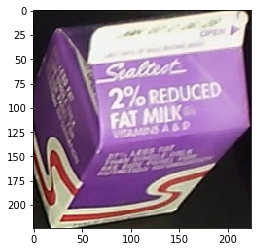

captured6830.jpg
CinamonToastCrunch
100


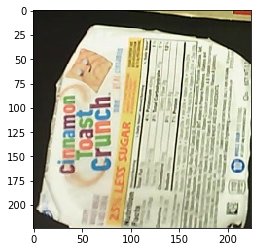

captured1981.jpg
GoldenGrahamsCereal
100


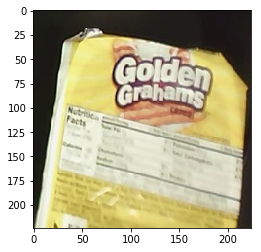

captured4295.jpg
QuarterPounder
99


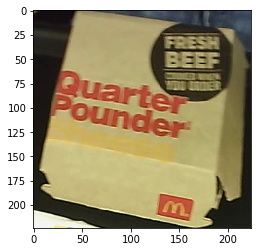

In [94]:
for i in range(len(df)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", 
                                 df["image_name"].iloc[i]))
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print(df["image_name"].iloc[i])
    print(df["FoodItem"].iloc[i])
    print(df["Probability"].iloc[i])
    plt.show()

# 
**SHOW ALL ITEMS***

In [95]:
itm_tags = dfx.FoodItem.value_counts() # FREQUENCY
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ['FoodItem', 'frequency']
itm_tags

FoodItem  frequency
0   CinamonToastCrunch         27
1           MilkPurple         15
2       QuarterPounder         13
3  GoldenGrahamsCereal          8
4                Chips          1

captured4295.jpg
QuarterPounder
99


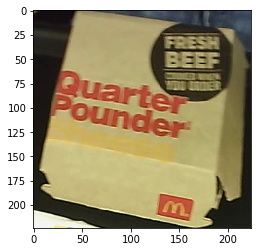

captured8866.jpg
QuarterPounder
99


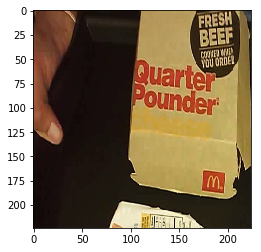

captured5164.jpg
QuarterPounder
99


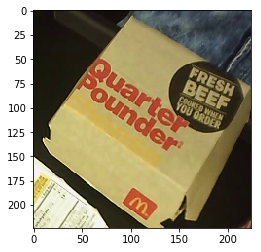

captured3771.jpg
QuarterPounder
99


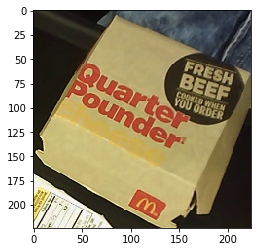

captured1029.jpg
QuarterPounder
99


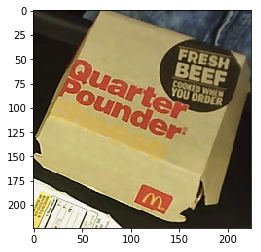

captured3006.jpg
QuarterPounder
99


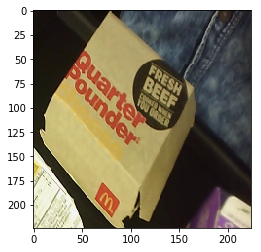

captured8609.jpg
QuarterPounder
99


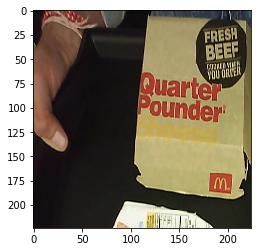

captured8574.jpg
QuarterPounder
99


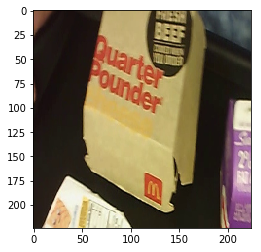

captured1154.jpg
QuarterPounder
99


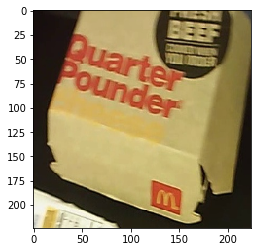

captured7344.jpg
QuarterPounder
99


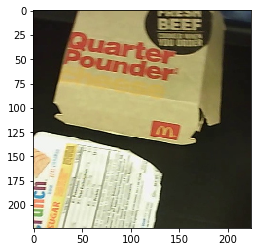

captured4136.jpg
QuarterPounder
98


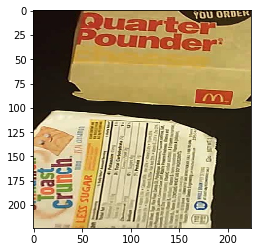

captured9295.jpg
QuarterPounder
44


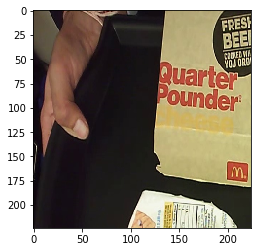

captured15.jpg
QuarterPounder
41


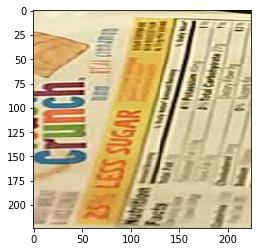

captured2801.jpg
MilkPurple
100


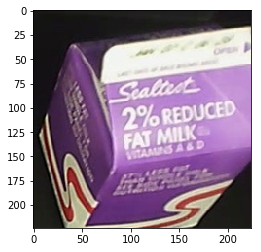

captured8621.jpg
MilkPurple
100


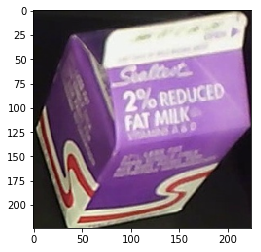

captured7245.jpg
MilkPurple
100


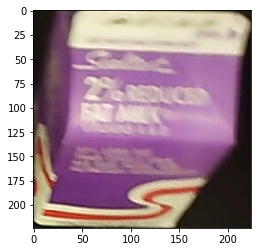

captured1750.jpg
MilkPurple
100


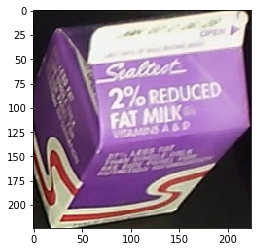

captured2674.jpg
MilkPurple
100


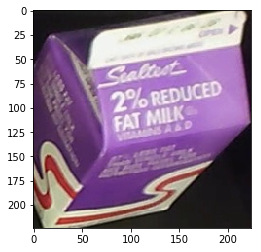

captured7386.jpg
MilkPurple
100


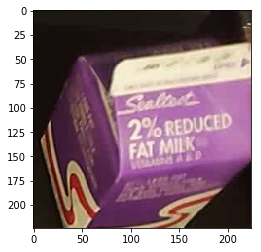

captured517.jpg
MilkPurple
99


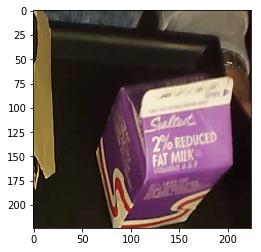

captured5880.jpg
MilkPurple
99


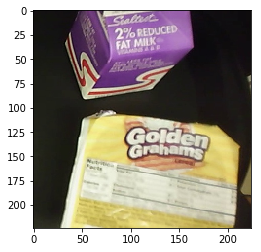

captured8606.jpg
MilkPurple
99


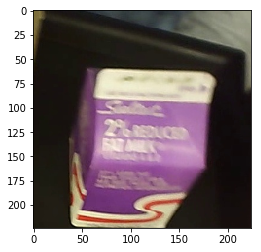

captured2475.jpg
MilkPurple
99


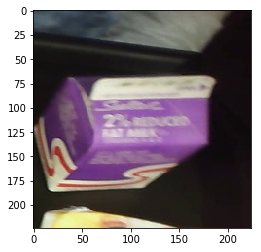

captured7679.jpg
MilkPurple
99


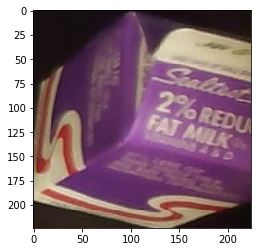

captured9222.jpg
MilkPurple
99


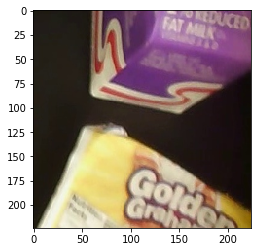

captured7034.jpg
MilkPurple
99


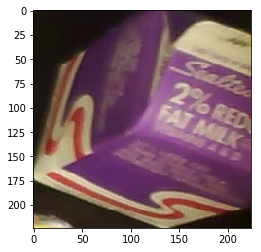

captured9805.jpg
MilkPurple
99


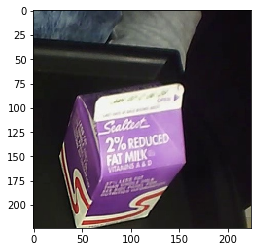

captured9374.jpg
MilkPurple
87


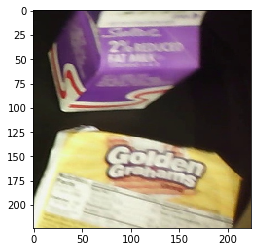

captured1981.jpg
GoldenGrahamsCereal
100


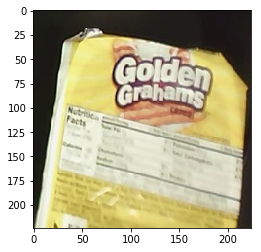

captured2984.jpg
GoldenGrahamsCereal
100


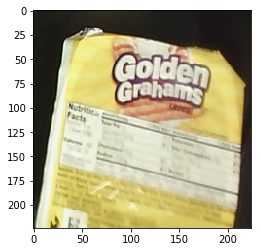

captured3448.jpg
GoldenGrahamsCereal
99


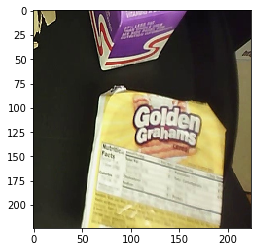

captured3299.jpg
GoldenGrahamsCereal
99


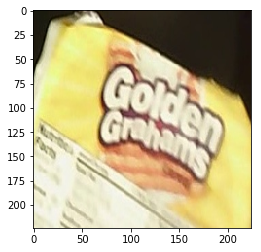

captured1772.jpg
GoldenGrahamsCereal
99


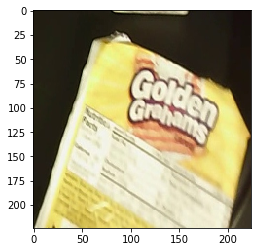

captured2291.jpg
GoldenGrahamsCereal
99


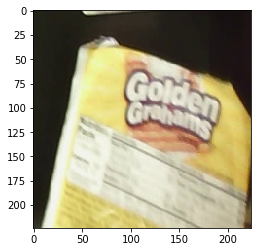

captured5859.jpg
GoldenGrahamsCereal
99


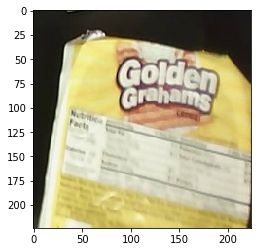

captured9225.jpg
GoldenGrahamsCereal
99


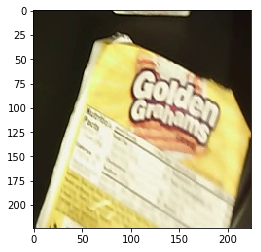

captured3458.jpg
CinamonToastCrunch
100


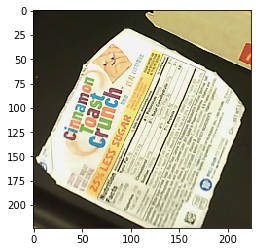

captured6830.jpg
CinamonToastCrunch
100


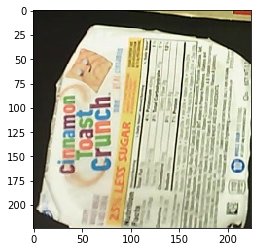

captured4900.jpg
CinamonToastCrunch
99


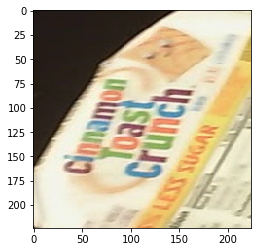

captured9217.jpg
CinamonToastCrunch
99


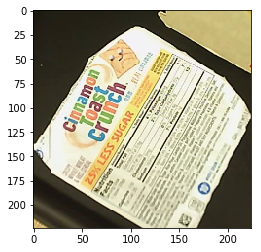

captured8120.jpg
CinamonToastCrunch
99


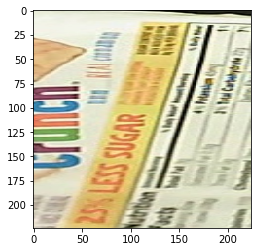

captured202.jpg
CinamonToastCrunch
99


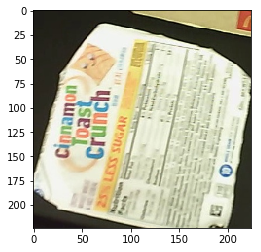

captured6814.jpg
CinamonToastCrunch
99


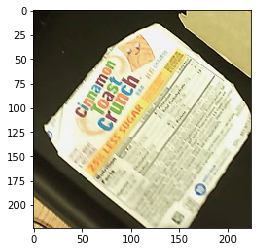

captured8391.jpg
CinamonToastCrunch
99


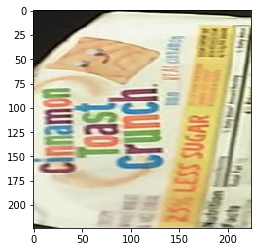

captured9488.jpg
CinamonToastCrunch
99


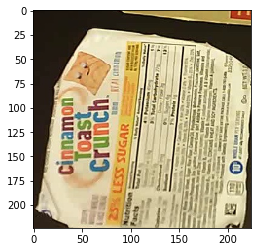

captured9322.jpg
CinamonToastCrunch
99


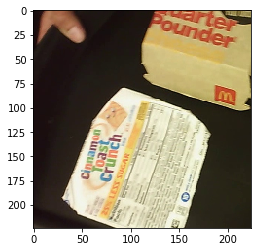

captured8772.jpg
CinamonToastCrunch
99


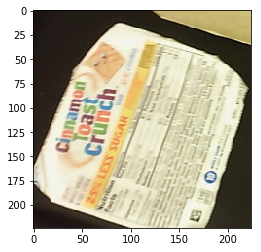

captured5243.jpg
CinamonToastCrunch
99


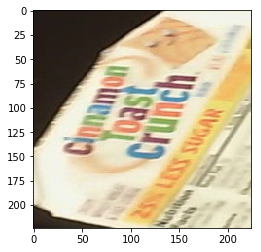

captured7508.jpg
CinamonToastCrunch
99


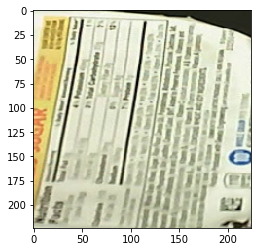

captured7727.jpg
CinamonToastCrunch
99


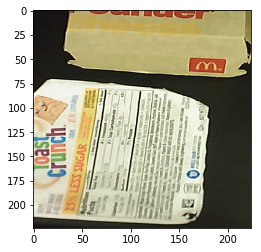

captured7192.jpg
CinamonToastCrunch
99


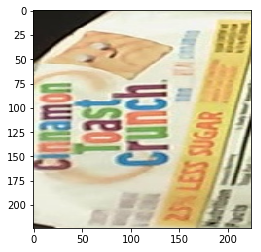

captured967.jpg
CinamonToastCrunch
99


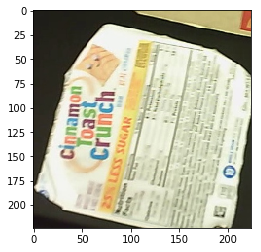

captured7027.jpg
CinamonToastCrunch
99


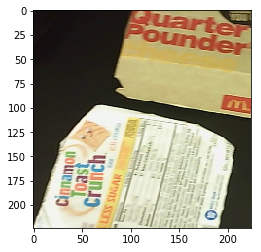

captured3873.jpg
CinamonToastCrunch
99


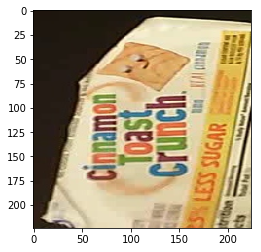

captured9233.jpg
CinamonToastCrunch
99


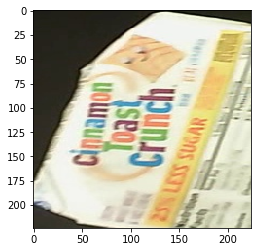

captured4065.jpg
CinamonToastCrunch
99


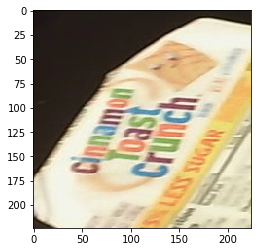

captured3559.jpg
CinamonToastCrunch
98


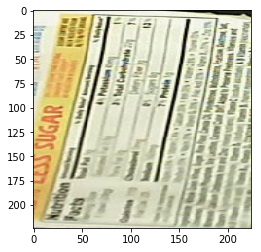

captured4574.jpg
CinamonToastCrunch
98


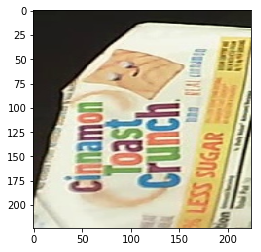

captured1019.jpg
CinamonToastCrunch
96


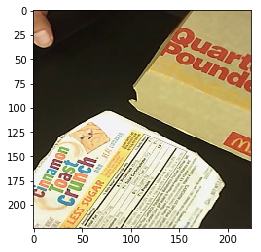

captured2479.jpg
CinamonToastCrunch
95


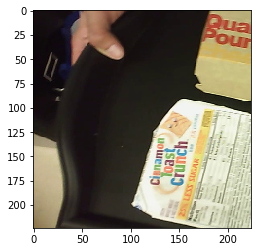

captured9615.jpg
CinamonToastCrunch
94


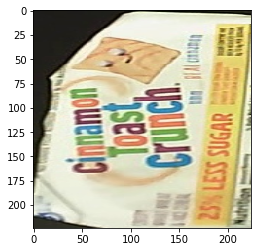

captured5369.jpg
CinamonToastCrunch
91


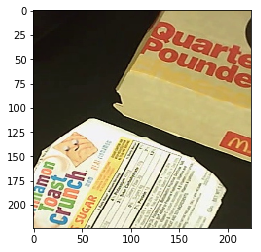

captured5565.jpg
CinamonToastCrunch
75


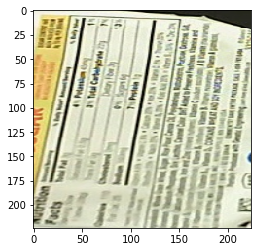

captured7939.jpg
Chips
86


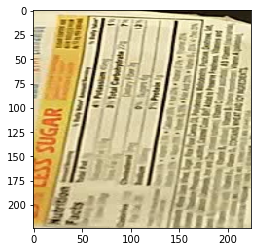

In [96]:
# show everything
for i in range(len(dfx)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", 
                                 dfx["image_name"].iloc[i]))
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print(dfx["image_name"].iloc[i])
    print(dfx["FoodItem"].iloc[i])
    print(dfx["Probability"].iloc[i])
    plt.show()

In [97]:
os.path.join(video_in, student_name, "objects")

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/in/srihith/objects'

In [98]:
os.chdir(os.path.join(video_in, student_name, "objects"))
capt_lst = os.listdir(".")
if '.DS_Store' in capt_lst: capt_lst.remove('.DS_Store')
len(capt_lst)
for capt in capt_lst:
    for d2 in dfx['FoodItem'][dfx['image_name'] == capt]:
        os.rename(capt, d2+str(random.randint(1,10000)) + '.jpg')

# PART Z
APPEND FOLDER w/ a random Number so same student can be re-entered 

In [99]:
'''
with open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv','w') as csvfile:
    fieldnames = ['FoodItem', 'Probability', 'image_name', 'dates', 'timestamp', 'student_name', 'Cost', 'studentid_conf', 'file_extn']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
'''

"\nwith open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv','w') as csvfile:\n    fieldnames = ['FoodItem', 'Probability', 'image_name', 'dates', 'timestamp', 'student_name', 'Cost', 'studentid_conf', 'file_extn']\n    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)\n    writer.writeheader()\n"

In [100]:
with open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv','a') as f:
    f.write('\n')
    df.to_csv(f, header=False, index = False, encoding='utf-8')

In [101]:
# ENDING WITH ADDING DATE TO THE FOLDER
now[:10]
file_ext = str(random.randint(1,1000))
os.rename(os.path.join(video_in, student_name ), 
          os.path.join(video_in, student_name + "_" + file_ext ) )  #str(now[:10]) ) )
print(file_ext)

426


# Part R

In [102]:
CafeRecords = pd.read_csv('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv', error_bad_lines=False)
CafeRecords['dates'] = pd.to_datetime(CafeRecords['dates']) 
CafeRecords.tail(4)

FoodItem  Probability        image_name      dates timestamp  \
108           MilkPurple        100.0  captured1750.jpg 2019-04-08  09:56:06   
109   CinamonToastCrunch        100.0  captured6830.jpg 2019-04-08  09:56:06   
110  GoldenGrahamsCereal        100.0  captured1981.jpg 2019-04-08  09:56:06   
111       QuarterPounder         99.0  captured4295.jpg 2019-04-08  09:56:06   

    student_name  Cost  studentid_conf  file_extn  
108      srihith    10           100.0         21  
109      srihith     4           100.0         21  
110      srihith     7           100.0         21  
111      srihith    13           100.0         21

In [103]:
#Current_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates == datetime.today().strftime('%Y-%m-%d')) >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )
Current_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates == date.today().strftime('%Y-%m-%d')) >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )
if Current_Spend.empty:
    Current_Spend  = pd.DataFrame(columns = ["student_name", "Total_Spend"])
    Current_Spend=  {'student_name' : student_name, "Total_Spend" : 0}

In [104]:
Current_Spend

student_name  Total_Spend
0      srihith           34

In [105]:
Semester_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates > '2019-01-01') >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )

In [106]:
purchase_hist = CafeRecords >> mask(X.student_name == student_name) >> group_by(X.student_name, X.FoodItem) >> summarize(Semester_Count = n(X.FoodItem) )
purchase_hist = list(zip(purchase_hist.FoodItem, purchase_hist.Semester_Count))

In [107]:
print('YOUR ACTIVITY SUMMARY WITH CAFE AI...')
print("------------->")
print('STUDENT NAME == ', student_name)
print("--------------->")
print('FACE RECOGINITION MODEL CONFIDENCE == %.lf' %(df['studentid_conf'][0]))
print("----------------->")
print("YOU BOUGHT (Prob)", list(zip(df.FoodItem,df.Probability)))
print("------------------>")
#print('DOLLARS SPEND $', Current_Spend[1])
print('TOTAL CHARGES TODAY == $%.lf' %(Current_Spend['Total_Spend'] ) )
print("------------------->")
#print('CURRENT SEMESTER SPEND', Semester_Spend[1])
print('TOTAL DEBIT THIS SEMESTER == $%.lf' %(Semester_Spend['Total_Spend'] ) )
print("--------------------->")
print('YOUR PURCHASE IN THIS SEMSTER ',  purchase_hist)
print("----------------------->")


YOUR ACTIVITY SUMMARY WITH CAFE AI...
------------->
STUDENT NAME ==  srihith
--------------->
FACE RECOGINITION MODEL CONFIDENCE == 100
----------------->
YOU BOUGHT (Prob) [('MilkPurple', 100), ('CinamonToastCrunch', 100), ('GoldenGrahamsCereal', 100), ('QuarterPounder', 99)]
------------------>
TOTAL CHARGES TODAY == $34
------------------->
TOTAL DEBIT THIS SEMESTER == $48
--------------------->
YOUR PURCHASE IN THIS SEMSTER  [('Cheerios', 1), ('CinamonToastCrunch', 1), ('GoldenGrahamsBar', 1), ('GoldenGrahamsCereal', 2), ('MilkPurple', 1), ('QuarterPounder', 1)]
----------------------->
